<a href="https://colab.research.google.com/github/CVanchieri/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/4_SequenceYourNarrative_Lecture%26Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
# if needed we can upgrade seaborn library.
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
# import seaborn and show version #.
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
# import the ibraries we are going to use.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

## Load & look at data

In [5]:
# load the data set.
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

# show the data set headers.
income.head(1)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603


In [6]:
# load the data set.
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

# show the data set headers.
lifespan.head(1)

,geo,time,life_expectancy_years
0,abw,1800,34.42


In [7]:
# load the data set.
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

# show the data set headers.
population.head(1)

,geo,time,population_total
0,afg,1800,3280000


In [8]:
# load the data set.
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

# show the data set headers.
entities.head(1)

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia


In [9]:
# load the data set.
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

# show the data set headers.
concepts.head(1)

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv


In [10]:
# show the shape of each data frame.
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [12]:
# we can show the end of the data set using .tail() to see what the most recent data is.
lifespan.tail()

,geo,time,life_expectancy_years
44365,zwe,2014,56.99
44366,zwe,2015,58.27
44367,zwe,2016,59.27
44368,zwe,2017,59.80
44369,zwe,2018,60.18


In [13]:
# we can see that the population # is not changing in these years so its possible they did not have good data.
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [14]:
# we can set a max to the columns we want to see from the data set.
pd.options.display.max_columns = 500

# show the data set headers.
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
# we can look at the value counts for the 'world_6region' column.
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [16]:
# show the data set headers.
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [17]:
# we can merge the 'income' & 'lifespan' data sets.
merged1 = pd.merge(income, lifespan)

# show the shape of the data set.
print(merged1.shape)

# show the data set headers.
merged1.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [18]:
# we can merge 'merged1' & 'population' data sets.
merged2 = pd.merge(merged1, population)

# show the shape of the data set.
print(merged2.shape)

# show the data set headers.
merged2.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [19]:
# we can merge 'merged2' data set & the columns we want from 'entities' data set.
df = pd.merge(merged2, entities[['country', 'name', 'world_4region', 'world_6region']], 
              how='inner', left_on='geo', right_on='country')

# show the shape of the data frame.
print(df.shape)

# show the data set and headers.
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [20]:
# we can drop the columns we are not going to use with df.drop().
df = df.drop(columns=['geo','country'])

# we can rename the columns that we are going to use.
df = df.rename(columns = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population', 
    'name': 'country',
    'world_4region': 'region4',
    'world_6region': 'region6'
})

# show the shape of the data frame.
print(df.shape)

# show the data set and headers.
df.head()

(40437, 7)


,year,income,lifespan,population,country,region4,region6
0,1800,603,28.21,3280000,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,Afghanistan,asia,south_asia


In [21]:
# check if we have any NA's in the data set.
df.isna().sum()

year          0
income        0
lifespan      0
population    0
country       0
region4       0
region6       0
dtype: int64

## Explore data

In [22]:
# we can see the counts per column and what data types with .info().
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 7 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region4       40437 non-null object
region6       40437 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.5+ MB


In [23]:
# we can look at the statistics #'s of the data set (int/float) in the data set.
df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [24]:
# we can look at the statisitcs #'s of (object) in the data set .
df.describe(exclude='number')

,country,region4,region6
count,40437,40437,40437
unique,187,4,6
top,Malaysia,africa,europe_central_asia
freq,219,11826,10778


In [25]:
# we can look at all the country names using .unique().
df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [26]:
# we can single out a specific country to look at.
usa = df[df.country == 'United States']

# we can set a few year dates to look for infomation specifc to those years.
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
38046,1818,2258,39.41,9879049,United States,americas,america
38146,1918,9371,47.18,106721812,United States,americas,america
38246,2018,54898,79.14,326766748,United States,americas,america


In [27]:
# we can single out a specific country to look at.
china = df[df.country == 'China']

# we can set a few year dates to look for infomation specifc to those years.
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
6854,1818,985,32.00,374161494,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,asia,east_asia_pacific


## Plot visualization

In [28]:
# we can create a data set of just a particular year.
now = df[df.year ==2018]

# show the shape of the data set.
now.shape

(184, 7)

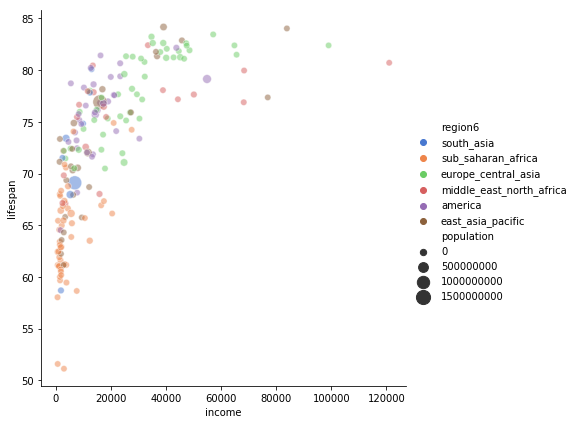

In [29]:
# w can use .relpot(), to create a scatter plot with color options for 'region6' for 2018.
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);

## Analyze outliers

In [30]:
# we can sort the data set by the 'income' column include only 80000 or more, and sort  =Flase to put highest income on top.
now[now.income > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region4,region6
30362,2018,121033,80.71,2694849,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,asia,east_asia_pacific


In [0]:
# we can add info to aspecific data point, here we will add the 'name' to the top data point 'Qatar'.

# we can single out the top 'income' country 'Qatar', 
qatar = now[now.country == 'Qatar']

# we need to find/set the income values for 'Qatar', so the chart has a value.
qatar_income = qatar.income.values[0]

# we need to find/set the 'lifepsan' values for 'Qatar', so the chart has a value.
qatar_lifespan = qatar.lifespan.values[0]

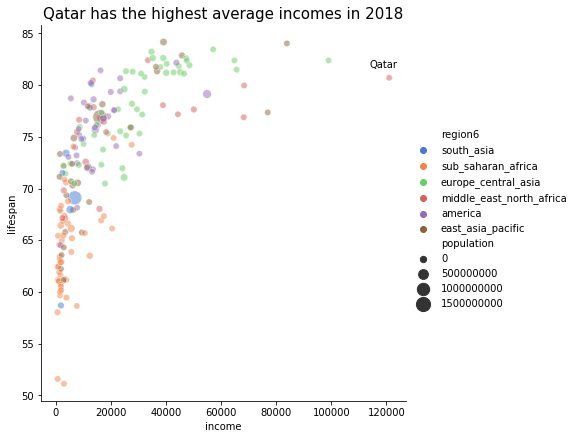

In [32]:
# we can use sns.replot() to create a scatter plot with colors/sizes for the 'region6' based on 'income' & 'lifespan' for 2018.
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);

# add a title to the chart so it visually makes sense.
plt.title('Qatar has the highest average incomes in 2018', fontsize=15)

# we can add the test of 'Qatar' and a location of the to income data point that is 'Qatar'.
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s = 'Qatar');

## Plot multiple years

In [33]:
# we can plot multiple years by setting the years we want to use.
years = [1818, 1918, 2018]

# we then use .isin() to remove any years we did not list.
centuries = df[df.year.isin(years)]

# show the data frame shape.
centuries.shape

(552, 7)

## Point out a story

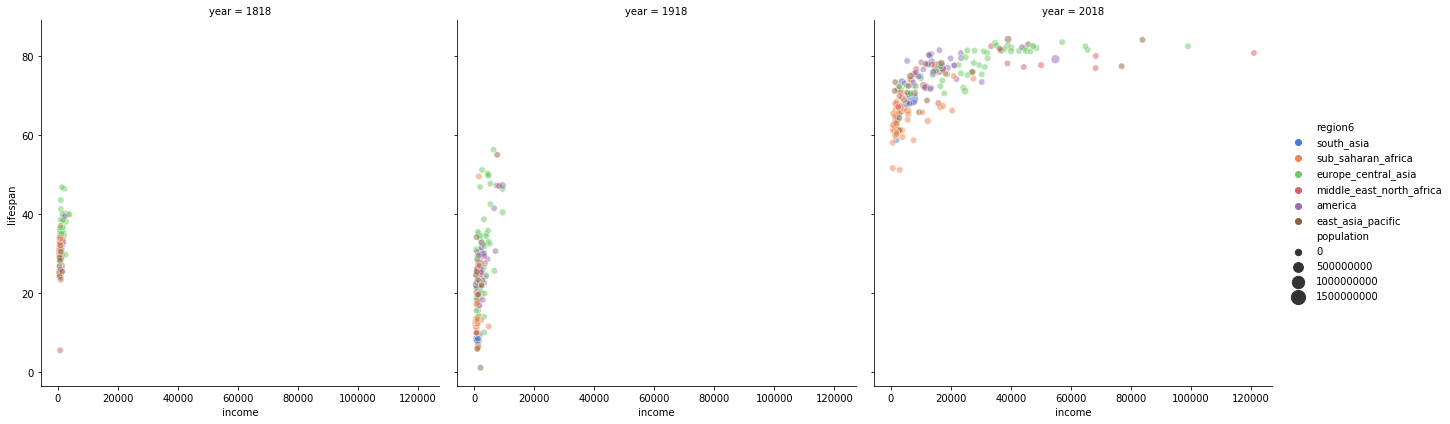

In [34]:
# we can use sns.replot() to create a scatter plot with colors/sizes for the 'region6' based on 'income' & 'lifespan' for the years we set.
sns.relplot(x="income", y="lifespan", hue="region6", size="population", col='year',
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=centuries);

# ASSIGNMENT
Replicate the lesson code


In [35]:
# import seaborn and show version #.
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
# import the ibraries we are going to use.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

start()

In [38]:
# load the data set.
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
# show the data set headers.
income.head(1)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603


In [39]:
# load the data set.
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
# show the data set headers.
lifespan.head(1)

,geo,time,life_expectancy_years
0,abw,1800,34.42


In [40]:
# load the data set.
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
# show the data set headers.
population.head(1)

,geo,time,population_total
0,afg,1800,3280000


In [41]:
# load the data set.
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
# show the data set headers.
entities.head(1)

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia


In [42]:
# load the data set.
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
# show the data set headers.
concepts.head(1)

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv


In [43]:
# show the shape of each data frame.
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [44]:
# show the data frame with headers.
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [45]:
# show the end of the data set using .tail() to see what the most recent data is.
lifespan.tail()

,geo,time,life_expectancy_years
44365,zwe,2014,56.99
44366,zwe,2015,58.27
44367,zwe,2016,59.27
44368,zwe,2017,59.80
44369,zwe,2018,60.18


In [46]:
# see that the population # is not changing in these years so its possible they did not have good data.
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [47]:
# set a max to the columns we want to see from the data set.
pd.options.display.max_columns = 500
# show the data set headers.
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [48]:
# look at the value counts for the 'world_6region' column.
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [49]:
# show the data set headers.
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


## Merge data

In [50]:
# merge the 'income' & 'lifespan' data sets.
merged1 = pd.merge(income, lifespan)
# show the shape of the data set.
print(merged1.shape)
# show the data set headers.
merged1.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [51]:
# merge 'merged1' & 'population' data sets.
merged2 = pd.merge(merged1, population)
# show the shape of the data set.
print(merged2.shape)
# show the data set headers.
merged2.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [52]:
# merge 'merged2' data set & the columns we want from 'entities' data set.
df = pd.merge(merged2, entities[['country', 'name', 'world_4region', 'world_6region']], 
              how='inner', left_on='geo', right_on='country')
# show the shape of the data frame.
print(df.shape)
# show the data set and headers.
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [53]:
# drop the columns we are not going to use with df.drop().
df = df.drop(columns=['geo','country'])
# rename the columns that we are going to use.
df = df.rename(columns = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population', 
    'name': 'country',
    'world_4region': 'region4',
    'world_6region': 'region6'
})
# show the shape of the data frame.
print(df.shape)
# show the data set and headers.
df.head()

(40437, 7)


,year,income,lifespan,population,country,region4,region6
0,1800,603,28.21,3280000,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,Afghanistan,asia,south_asia


In [54]:
# check if we have any NA's in the data set.
df.isna().sum()

year          0
income        0
lifespan      0
population    0
country       0
region4       0
region6       0
dtype: int64

In [55]:
# see the counts per column and what data types with .info().
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 7 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region4       40437 non-null object
region6       40437 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.5+ MB


In [56]:
# look at the statistics #'s of the data set (int/float) in the data set.
df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [57]:
# look at the statisitcs #'s of (object) in the data set .
df.describe(exclude='number')

,country,region4,region6
count,40437,40437,40437
unique,187,4,6
top,Malaysia,africa,europe_central_asia
freq,219,11826,10778


In [58]:
# look at all the country names using .unique().
df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [59]:
# single out a specific country to look at.
usa = df[df.country == 'United States']
# set a few year dates to look for infomation specifc to those years.
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
38046,1818,2258,39.41,9879049,United States,americas,america
38146,1918,9371,47.18,106721812,United States,americas,america
38246,2018,54898,79.14,326766748,United States,americas,america


In [60]:
# single out a specific country to look at.
china = df[df.country == 'China']

# set a few year dates to look for infomation specifc to those years.
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
6854,1818,985,32.00,374161494,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,asia,east_asia_pacific


In [64]:
# single out a specific country to look at.
lesotho = df[df.country == 'Lesotho']
# set a few year dates to look for infomation specifc to those years.
lesotho[lesotho.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region4,region6
21574,1818,397,32.80,279997,Lesotho,africa,sub_saharan_africa
21674,1918,420,13.53,575824,Lesotho,africa,sub_saharan_africa
21774,2018,2960,51.12,2263010,Lesotho,africa,sub_saharan_africa


## Plot visualization

In [65]:
# create a data set of just a particular year.
now = df[df.year ==2018]
# show the shape of the data set.
now.shape

(184, 7)

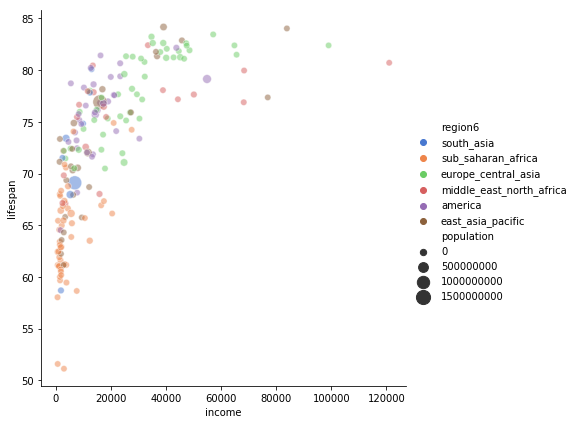

In [66]:
# use .relpot(), to create a scatter plot with color options for 'region6' for 2018.
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);

## Analyze outliers, highest average income in 2018.

In [67]:
# sort the data set by the 'income' column include only 80000 or more, and sort  =Flase to put highest income on top.
now[now.income > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region4,region6
30362,2018,121033,80.71,2694849,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,asia,east_asia_pacific


In [0]:
# add info to aspecific data point, here we will add the 'name' to the top data point 'Qatar'.

# single out the top 'income' country 'Qatar', 
qatar = now[now.country == 'Qatar']
# find/set the income values for 'Qatar', so the chart has a value.
qatar_income = qatar.income.values[0]
# find/set the 'lifepsan' values for 'Qatar', so the chart has a value.
qatar_lifespan = qatar.lifespan.values[0]

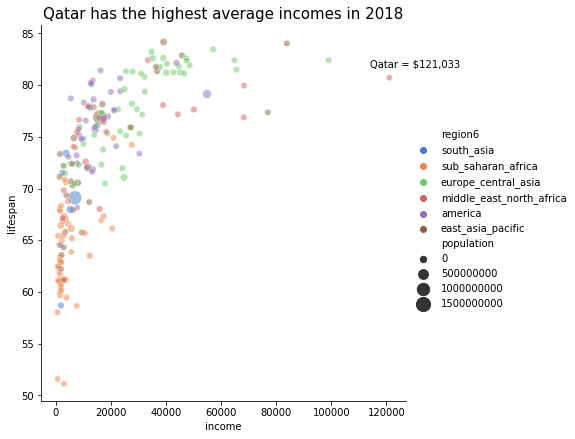

In [69]:
# use sns.replot() to create a scatter plot with colors/sizes for the 'region6' based on 'income' & 'lifespan' for 2018.
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);
# add a title to the chart so it visually makes sense.
plt.title('Qatar has the highest average incomes in 2018', fontsize=15)
# add the test of 'Qatar' and a location of the to income data point that is 'Qatar'.
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s = 'Qatar = $121,033');

## Analyze outliers, lowest average lifespan in 2018.



In [0]:
# add info to aspecific data point, here we will add the 'name' to the lowest 'lifespan' data point 'Lesotho'.

# single out the lowest 'lifespan' country 'Lesotho'.
lesotho = now[now.country == 'Lesotho']
# find/set the income values for 'Qatar', so the chart has a value.
lesotho_income = lesotho.income.values[0]
# find/set the 'lifepsan' values for 'Qatar', so the chart has a value.
lesotho_lifespan = lesotho.lifespan.values[0]

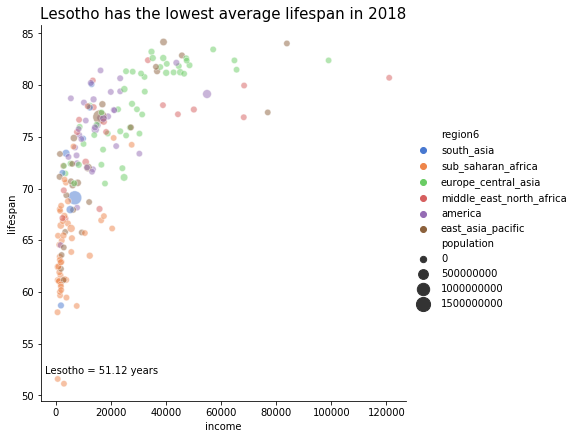

In [71]:
# use sns.replot() to create a scatter plot with colors/sizes for the 'region6' based on 'income' & 'lifespan' for 2018.
sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);
# add a title to the chart so it visually makes sense.
plt.title('Lesotho has the lowest average lifespan in 2018', fontsize=15)
# add the test of 'Qatar' and a location of the to income data point that is 'Qatar'.
plt.text(x=lesotho_income-7000, y=lesotho_lifespan+1, s = 'Lesotho = 51.12 years');

## Plot multiple years

In [72]:
# plot multiple years by setting the years we want to use.
years = [1988, 1998, 2008, 2018]
# use .isin() to remove any years we did not list.
centuries = df[df.year.isin(years)]
# show the data frame shape.
centuries.shape

(745, 7)

## Point out a story

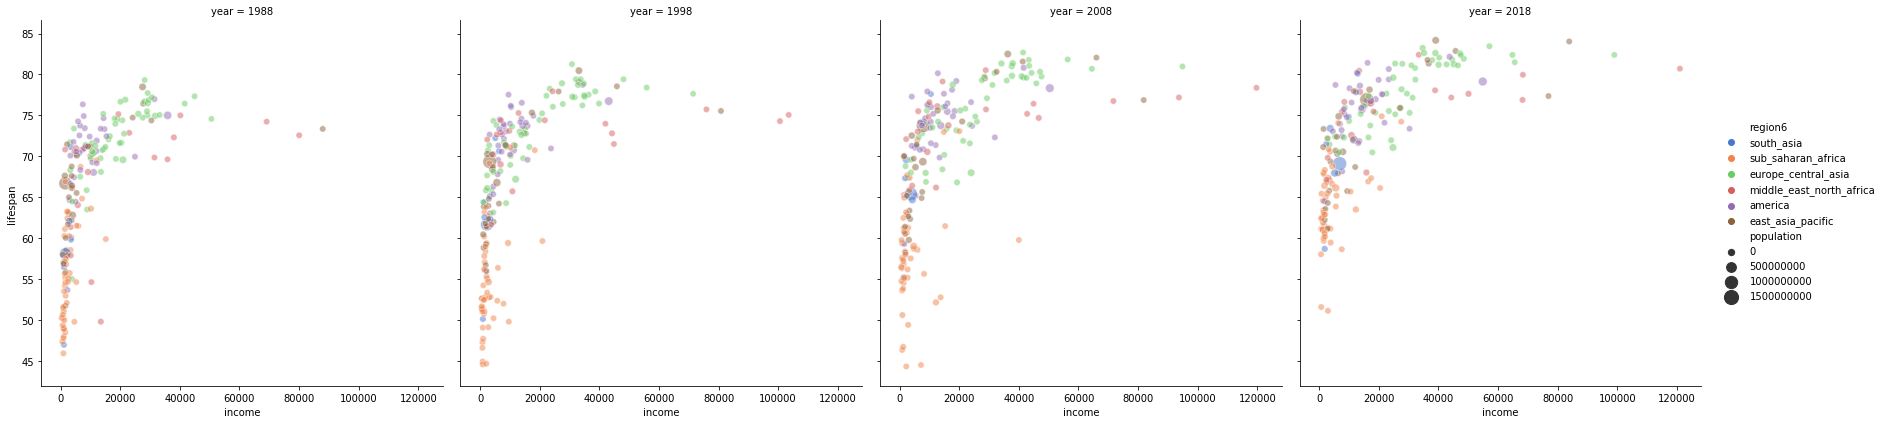

In [73]:
# use sns.replot() to create a scatter plot with colors/sizes for the 'region6' based on 'income' & 'lifespan' for the years we set.
sns.relplot(x="income", y="lifespan", hue="region6", size="population", col='year',
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=centuries);

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project